## Handling Missing Numerical Data

There are 2 types of Numeric Data

1.Univariate Imputation-if you are using single column and statistical method such as mean median etc to fill the values then its called numeric imputation
2.Multivariate Imputation-if you are using multiple columns to fill missing values then its called Multivariate.

## 1.Numeric Univariate Imputation

####1.1 Missing Values with Mean/Median-we can fill the values with mean or median of column 
Advatages-1.1 Simple 1.2 if missing value greater than 5% then its not good. 

Disadvantages 1.1 changes distribution of data 
             1.2 add few more outliers
             1.3 changes correlation between other column

when to use

1.1 when data is missing completely random
1.2 if less than 5% data is missing

## 1.1 Filling Missing Values with MEAN OR MEDIAN 

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [151]:
df=pd.read_csv("/Users/pluto7/Desktop/git_data/ML_algorithem/Univariate_analysis/titanic.csv")

In [152]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
df=df[["Age","Fare","Survived"]]

In [154]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [155]:
df.isnull().mean()


Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [156]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [158]:
X_train.shape, X_test.shape


((712, 2), (179, 2))

In [159]:
X_train.isnull().mean()


Age     0.207865
Fare    0.000000
dtype: float64

In [160]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [161]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)


In [162]:
X_train.sample(15)


,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
761,41.0,7.1250,41.00,41.000000,7.1250,7.1250
745,70.0,71.0000,70.00,70.000000,71.0000,71.0000
461,34.0,8.0500,34.00,34.000000,8.0500,8.0500
872,33.0,5.0000,33.00,33.000000,5.0000,5.0000
855,18.0,9.3500,18.00,18.000000,9.3500,9.3500
450,36.0,27.7500,36.00,36.000000,27.7500,27.7500
98,34.0,23.0000,34.00,34.000000,23.0000,23.0000
111,14.5,14.4542,14.50,14.500000,14.4542,14.4542
679,36.0,512.3292,36.00,36.000000,512.3292,512.3292
768,NaN,24.1500,28.75,29.785904,24.1500,24.1500


In [163]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2368.2468324201327
Fare Variance after median imputation:  2368.2468324201327
Fare Variance after mean imputation:  2368.2468324201327


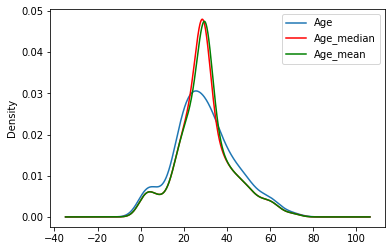

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

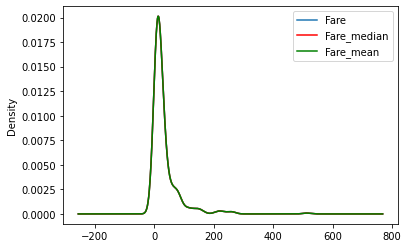

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [166]:
X_train.cov()


,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,71.512440,204.349513,204.349513,71.512440,71.512440
Fare,71.512440,2368.246832,58.986531,56.626587,2368.246832,2368.246832
Age_median,204.349513,58.986531,161.989566,161.812625,58.986531,58.986531
Age_mean,204.349513,56.626587,161.812625,161.812625,56.626587,56.626587
Fare_median,71.512440,2368.246832,58.986531,56.626587,2368.246832,2368.246832
Fare_mean,71.512440,2368.246832,58.986531,56.626587,2368.246832,2368.246832


In [167]:
X_train.corr()


,Age,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.095814,1.000000,1.000000,0.095814,0.095814
Fare,0.095814,1.000000,0.095235,0.091475,1.000000,1.000000
Age_median,1.000000,0.095235,1.000000,0.999454,0.095235,0.095235
Age_mean,1.000000,0.091475,0.999454,1.000000,0.091475,0.091475
Fare_median,0.095814,1.000000,0.095235,0.091475,1.000000,1.000000
Fare_mean,0.095814,1.000000,0.095235,0.091475,1.000000,1.000000


<AxesSubplot:>

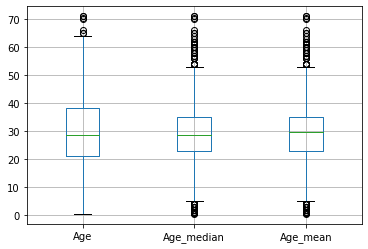

In [168]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()


<AxesSubplot:>

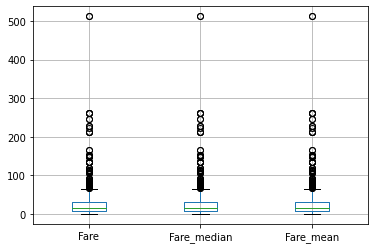

In [169]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()


## Using Sklearn

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [171]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [172]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [173]:
trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [174]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [175]:
trf.named_transformers_['imputer2'].statistics_


array([32.28905604])

In [176]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [177]:
X_train


array([[ 40.    ,  27.7208],
       [  4.    ,  16.7   ],
       [ 47.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042],
       [ 28.75  , 221.7792],
       [ 28.75  ,  25.925 ]])

## 1.2 Filling Missing values with Arbitary Values

##

We can change the Missing Values with any arbitory values 
Disadvantages 1.1 changes distribution of data 
             1.2 add few more outliers
             1.3 changes correlation between other column
 if data is not missing randomly
 

In [178]:
df2=pd.read_csv("/Users/pluto7/Desktop/git_data/ML_algorithem/Univariate_analysis/titanic.csv")

In [179]:
X = df2.drop(columns=['Survived'])
y = df2['Survived']

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [181]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2368.2468324201327
Fare Variance after 999 wala imputation:  2368.2468324201327
Fare Variance after -1 wala imputation:  2368.2468324201327


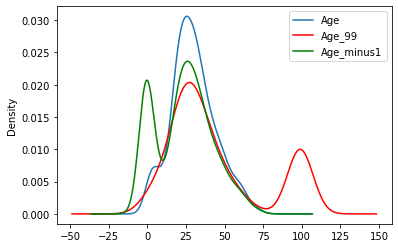

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


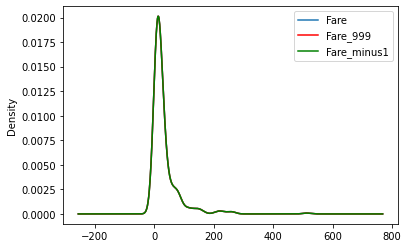

In [183]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [184]:
X_train.cov()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
PassengerId,67083.511868,-1.530927,44.696863,-19.213776,2.116239,288.248615,-78.488425,86.046412,288.248615,288.248615
Pclass,-1.530927,0.702784,-4.566284,0.099283,0.023681,-22.791180,0.717828,-5.543333,-22.791180,-22.791180
Age,44.696863,-4.566284,204.349513,-4.165283,-2.333618,71.512440,204.349513,204.349513,71.512440,71.512440
SibSp,-19.213776,0.099283,-4.165283,1.267996,0.379281,8.567003,-2.396963,-3.699133,8.567003,8.567003
Parch,2.116239,0.023681,-2.333618,0.379281,0.708695,8.280261,-4.990324,-0.450113,8.280261,8.280261
Fare,288.248615,-22.791180,71.512440,8.567003,8.280261,2368.246832,-101.053412,126.761454,2368.246832,2368.246832
Age_99,-78.488425,0.717828,204.349513,-2.396963,-4.990324,-101.053412,951.727557,-189.535540,-101.053412,-101.053412
Age_minus1,86.046412,-5.543333,204.349513,-3.699133,-0.450113,126.761454,-189.535540,318.089620,126.761454,126.761454
Fare_999,288.248615,-22.791180,71.512440,8.567003,8.280261,2368.246832,-101.053412,126.761454,2368.246832,2368.246832
Fare_minus1,288.248615,-22.791180,71.512440,8.567003,8.280261,2368.246832,-101.053412,126.761454,2368.246832,2368.246832


In [185]:
X_train.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
PassengerId,1.000000,-0.007051,0.011997,-0.065879,0.009706,0.022869,-0.009823,0.018627,0.022869,0.022869
Pclass,-0.007051,1.000000,-0.380253,0.105173,0.033555,-0.558653,0.027756,-0.370753,-0.558653,-0.558653
Age,0.011997,-0.380253,1.000000,-0.309514,-0.182537,0.095814,1.000000,1.000000,0.095814,0.095814
SibSp,-0.065879,0.105173,-0.309514,1.000000,0.400103,0.156335,-0.069000,-0.184190,0.156335,0.156335
Parch,0.009706,0.033555,-0.182537,0.400103,1.000000,0.202116,-0.192151,-0.029979,0.202116,0.202116
Fare,0.022869,-0.558653,0.095814,0.156335,0.202116,1.000000,-0.067310,0.146049,1.000000,1.000000
Age_99,-0.009823,0.027756,1.000000,-0.069000,-0.192151,-0.067310,1.000000,-0.344476,-0.067310,-0.067310
Age_minus1,0.018627,-0.370753,1.000000,-0.184190,-0.029979,0.146049,-0.344476,1.000000,0.146049,0.146049
Fare_999,0.022869,-0.558653,0.095814,0.156335,0.202116,1.000000,-0.067310,0.146049,1.000000,1.000000
Fare_minus1,0.022869,-0.558653,0.095814,0.156335,0.202116,1.000000,-0.067310,0.146049,1.000000,1.000000


## Using Sklearn


In [186]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [187]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [188]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [189]:
trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [190]:
trf.named_transformers_['imputer1'].statistics_


array([99.])

In [191]:
trf.named_transformers_['imputer2'].statistics_


array([999.])

In [192]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

## 1.3 End of Distribution Imputation
it Data is not distributted randomly

1.if data is normally distributed we use (mean+3*standard deviation) or (mean-3*standard deviation )

2.if data is skewed we use IQR proximity rule

Disadvantages 1.1 changes distribution of data 
             1.2 add few more outliers
             1.3 changes correlation between other column

